In [20]:
# https://www.youtube.com/watch?v=fJ3CfEwr39k
# description: create and plot multiple technical indicators

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [22]:
# load the stock data
import pandas_datareader
import datetime
import pandas_datareader.data as web
start = datetime.datetime(2019, 11, 25)
end = datetime.datetime(2020, 11, 23)
tesla = web.DataReader('TSLA', 'yahoo', start, end)
tesla
# tesla = pd.read_csv("TSLA.csv")
# tesla = tesla.set_index(pd.DateTimeIndex(tesla.Date.values))

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-25,68.914001,66.891998,68.863998,67.267998,61697500.0,67.267998
2019-11-26,67.099998,65.419998,67.054001,65.783997,39737000.0,65.783997
2019-11-27,66.786003,65.713997,66.223999,66.258003,27778000.0,66.258003
2019-11-29,66.251999,65.500000,66.222000,65.987999,12328000.0,65.987999
2019-12-02,67.276001,65.737999,65.879997,66.973999,30372500.0,66.973999
...,...,...,...,...,...,...
2020-11-17,462.000000,433.010010,460.170013,441.609985,61188300.0,441.609985
2020-11-18,496.000000,443.500000,448.350006,486.640015,78044000.0,486.640015
2020-11-19,508.609985,487.570007,492.000000,499.269989,62475300.0,499.269989


In [38]:
# calculate the SMA (Simple Moving Average)
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

# calculate the EMA (Exponential Moving Average)
def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

# calculate the MACD (Moving Average Convergence/Divergence)
def MACD(data, period_long=26, period_short=12, period_signal=9, column='Close'):
    # calculate the short term EMA
    shortEMA = EMA(data, period_short, column)
    # calculate the long term EMA
    longEMA = EMA(data, period_long, column)
    # now calculate the MACD
    data['MACD'] = shortEMA - longEMA
    # calculate the signal line
    data['Signal Line'] = EMA(data, period_signal, 'MACD')
    
    return data

# calculate the RSI (Relative Strength Index)
def RSI(data, period=14, column='Close'):
    delta = data[column].diff(1)
    # remove the first row
    delta = delta[1:]

    gain = delta.copy()
    loss = delta.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    data['Gain'] = gain
    data['Loss'] = loss
    
    average_gain = SMA(data, period, 'Gain')
    del data['Gain']

    average_loss = abs(SMA(data, period, 'Loss'))
    
    relative_strength = average_gain / average_loss
    index = 100.0 - (100.0 / (1.0 + relative_strength))
    data['RSI'] = index

    return data

In [39]:
# create or add to the dataset
MACD(tesla)
RSI(tesla)
tesla['SMA'] = SMA(tesla)
tesla['EMA'] = EMA(tesla)

AttributeError: Gain

In [29]:
# show the data
tesla

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Gain,Loss,RSI,SMA,EMA
Date,,,,,,,,,,,,,
2019-11-25,68.914001,66.891998,68.863998,67.267998,61697500.0,67.267998,0.000000,0.000000,NaN,NaN,NaN,NaN,67.267998
2019-11-26,67.099998,65.419998,67.054001,65.783997,39737000.0,65.783997,-0.118382,-0.023676,0.000000,-1.484001,NaN,NaN,67.126664
2019-11-27,66.786003,65.713997,66.223999,66.258003,27778000.0,66.258003,-0.171970,-0.053335,0.474007,0.000000,NaN,NaN,67.043935
2019-11-29,66.251999,65.500000,66.222000,65.987999,12328000.0,65.987999,-0.233533,-0.089375,0.000000,-0.270004,NaN,NaN,66.943369
2019-12-02,67.276001,65.737999,65.879997,66.973999,30372500.0,66.973999,-0.200450,-0.111590,0.986000,0.000000,NaN,NaN,66.946286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17,462.000000,433.010010,460.170013,441.609985,61188300.0,441.609985,-0.092284,-0.721034,33.519989,0.000000,61.083776,424.261333,419.728305
2020-11-18,496.000000,443.500000,448.350006,486.640015,78044000.0,486.640015,5.277840,0.478741,45.030029,0.000000,68.879821,426.306001,426.100849
2020-11-19,508.609985,487.570007,492.000000,499.269989,62475300.0,499.269989,10.432576,2.469508,12.629974,0.000000,79.177375,428.751000,433.069338


In [15]:
# plot the chart
def plot(data, columns, title):
    data[columns].plot(figsize=(12.2, 6.4))
    plt.title(title)
    plt.ylabel('USD Price')
    plt.xlabel('Date')
    plt.show()

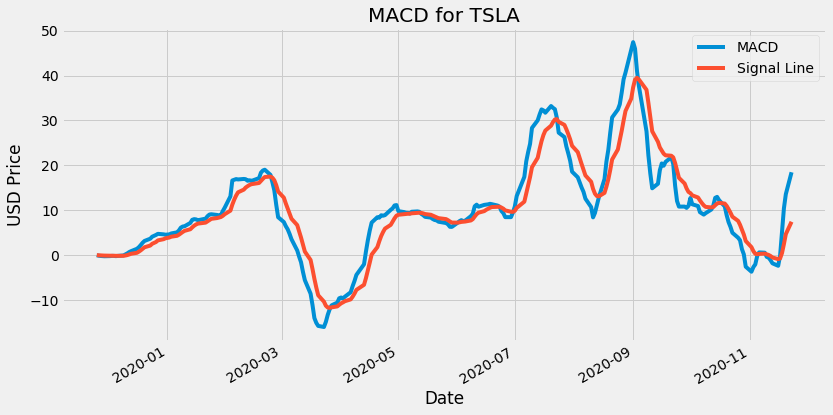

In [16]:
plot(tesla, ['MACD', 'Signal Line'], 'MACD for TSLA')

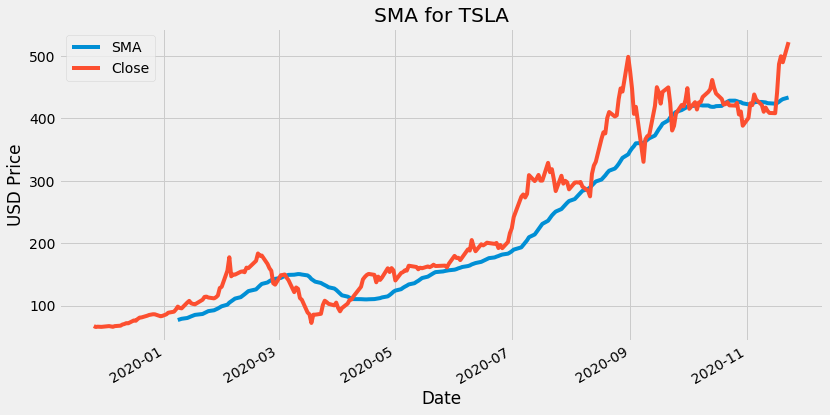

In [17]:
plot(tesla, ['SMA', 'Close'], 'SMA for TSLA')

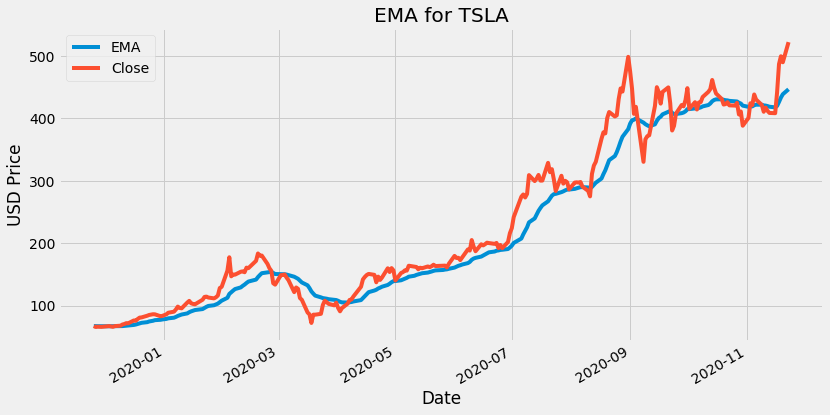

In [18]:
plot(tesla, ['EMA', 'Close'], 'EMA for TSLA')

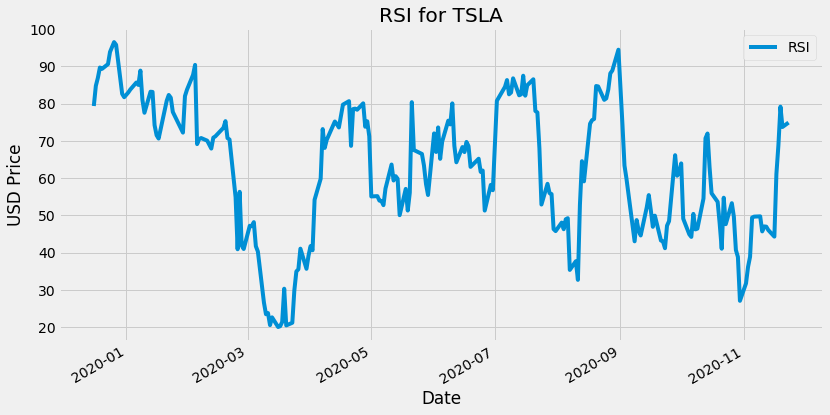

In [19]:
plot(tesla, ['RSI'], 'RSI for TSLA')